In [1]:
# READ THE DATA AND DECLARE IMPORTS FOR GRAPHING AND OTHER PROCESSING
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

In [2]:
# access and read the dataset
dataset = "Interpersonal Relationships Research 2.csv"
data = pd.read_csv(dataset)
data.describe()

,What is your Age?,What is your Gender?,"With respect to interpersonal relationships, would you describe yourself as trusting or cautious?","Based on your previous answer, why do you think it is important to be trusting or cautious with respect to others? (Be as detailed as you like in your response)"
count,309,309,309,309
unique,5,4,2,308
top,18-25,Male,Cautious,Cautious
freq,116,150,177,2


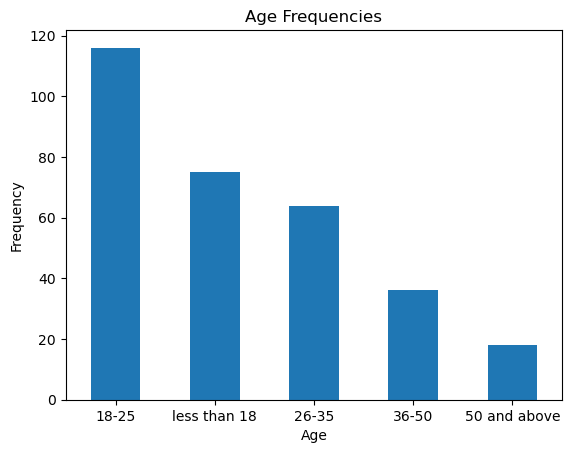

In [3]:
# Calculate the age frequencies
age_freq = data['What is your Age?'].value_counts()

# Create a bar graph of the gender frequencies
age_plot = age_freq.plot(kind='bar')

# Set the axis labels and title
age_plot.set_xlabel('Age')
age_plot.set_ylabel('Frequency')
age_plot.set_title('Age Frequencies')

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig1 = plt.gcf()
fig1.savefig('Age_Frequencies.png', dpi=300)

# Show the plot
plt.show()

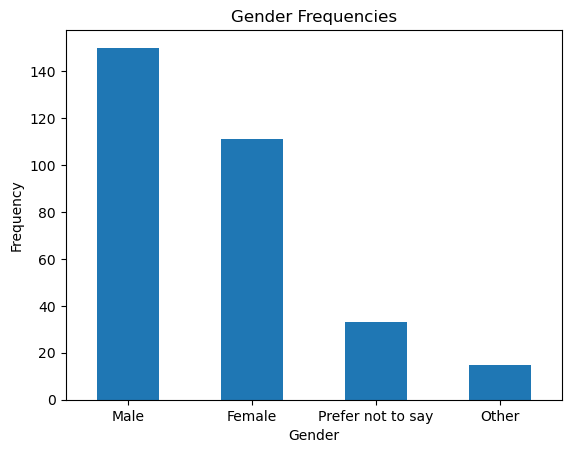

In [4]:
# Calculate gender frequencies
gender_freq = data['What is your Gender?'].value_counts()

# Create a bar graph of the gender frequencies
gender_plot = gender_freq.plot(kind='bar')

# Set the axis labels and title
gender_plot.set_xlabel('Gender')
gender_plot.set_ylabel('Frequency')
gender_plot.set_title('Gender Frequencies')

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig2 = plt.gcf()
fig2.savefig('Gender_Frequencies.png', dpi=300)

# Show the plot
plt.show()

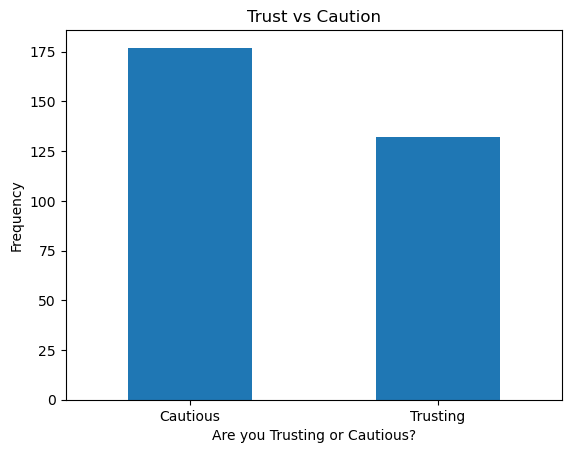

In [5]:
# Calculate trust v caution frequencies
TvC_freq = data['With respect to interpersonal relationships, would you describe yourself as trusting or cautious?'].value_counts()

# Create a bar graph of the trust and caution frequencies
TvC_plot = TvC_freq.plot(kind='bar')

# Set the axis labels and title
TvC_plot.set_xlabel('Are you Trusting or Cautious?')
TvC_plot.set_ylabel('Frequency')
TvC_plot.set_title('Trust vs Caution')

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig3 = plt.gcf()
fig3.savefig('Trust_vs_Caution.png', dpi=300)

# Show the plot
plt.show()

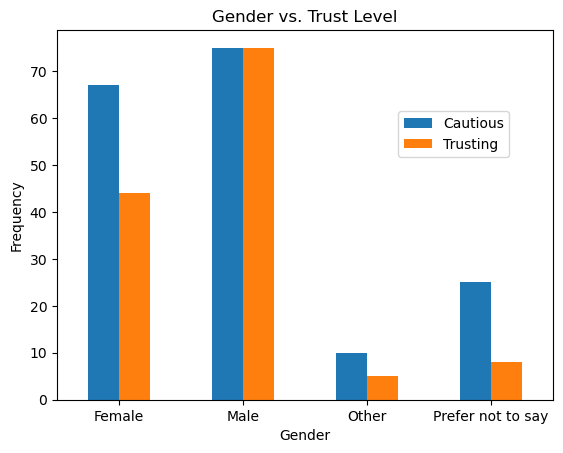

In [6]:
trust_by_gender = pd.crosstab(data['What is your Gender?'], data['With respect to interpersonal relationships, would you describe yourself as trusting or cautious?'])

# Create a bar graph of the contingency table
ax = trust_by_gender.plot(kind='bar')

# Set the axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Frequency')
ax.set_title('Gender vs. Trust Level')

# Set the position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=1)

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig4 = plt.gcf()
fig4.savefig('Gender_vs_Trust_Level.png', dpi=300)

# Show the plot
plt.show()

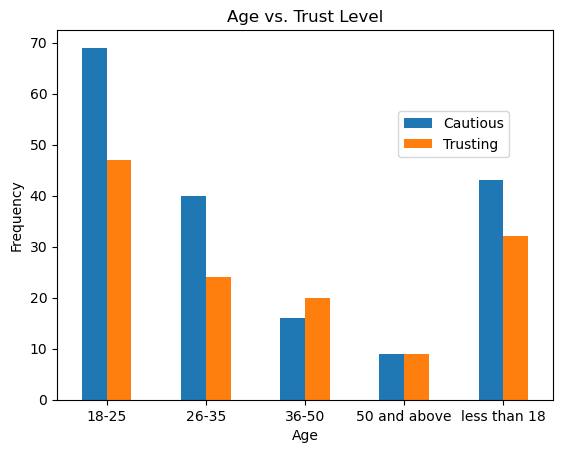

In [7]:
trust_by_age = pd.crosstab(data['What is your Age?'], data['With respect to interpersonal relationships, would you describe yourself as trusting or cautious?'])

# Create a bar graph of the contingency table
ax = trust_by_age.plot(kind='bar')

# Set the axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Age vs. Trust Level')

# Set the position of the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.8, 0.8), ncol=1)

# Rotate the x-axis tick labels
plt.xticks(rotation=0)

fig5 = plt.gcf()
fig5.savefig('Age_vs_Trust_Level.png', dpi=300)

# Show the plot
plt.show()

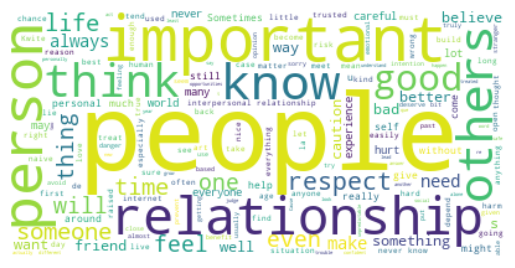

In [10]:
reasons = ' '.join(data["Based on your previous answer, why do you think it is important to be trusting or cautious with respect to others? (Be as detailed as you like in your response)"])

# Add new words to the exclusion list
common_stopwords = set(STOPWORDS)
common_stopwords.update(["trust", "cautious", "trusting"])


# Generate a word cloud image
wordcloud = WordCloud(background_color='rgba(255, 255, 255, 0)', 
                      stopwords=common_stopwords, 
                      prefer_horizontal=0.9,
                      collocations=True,
                      collocation_threshold=50).generate(reasons)

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

fig1 = plt.gcf()
fig1.savefig('Reasoning_WordCloud.png', dpi=300)

plt.show()

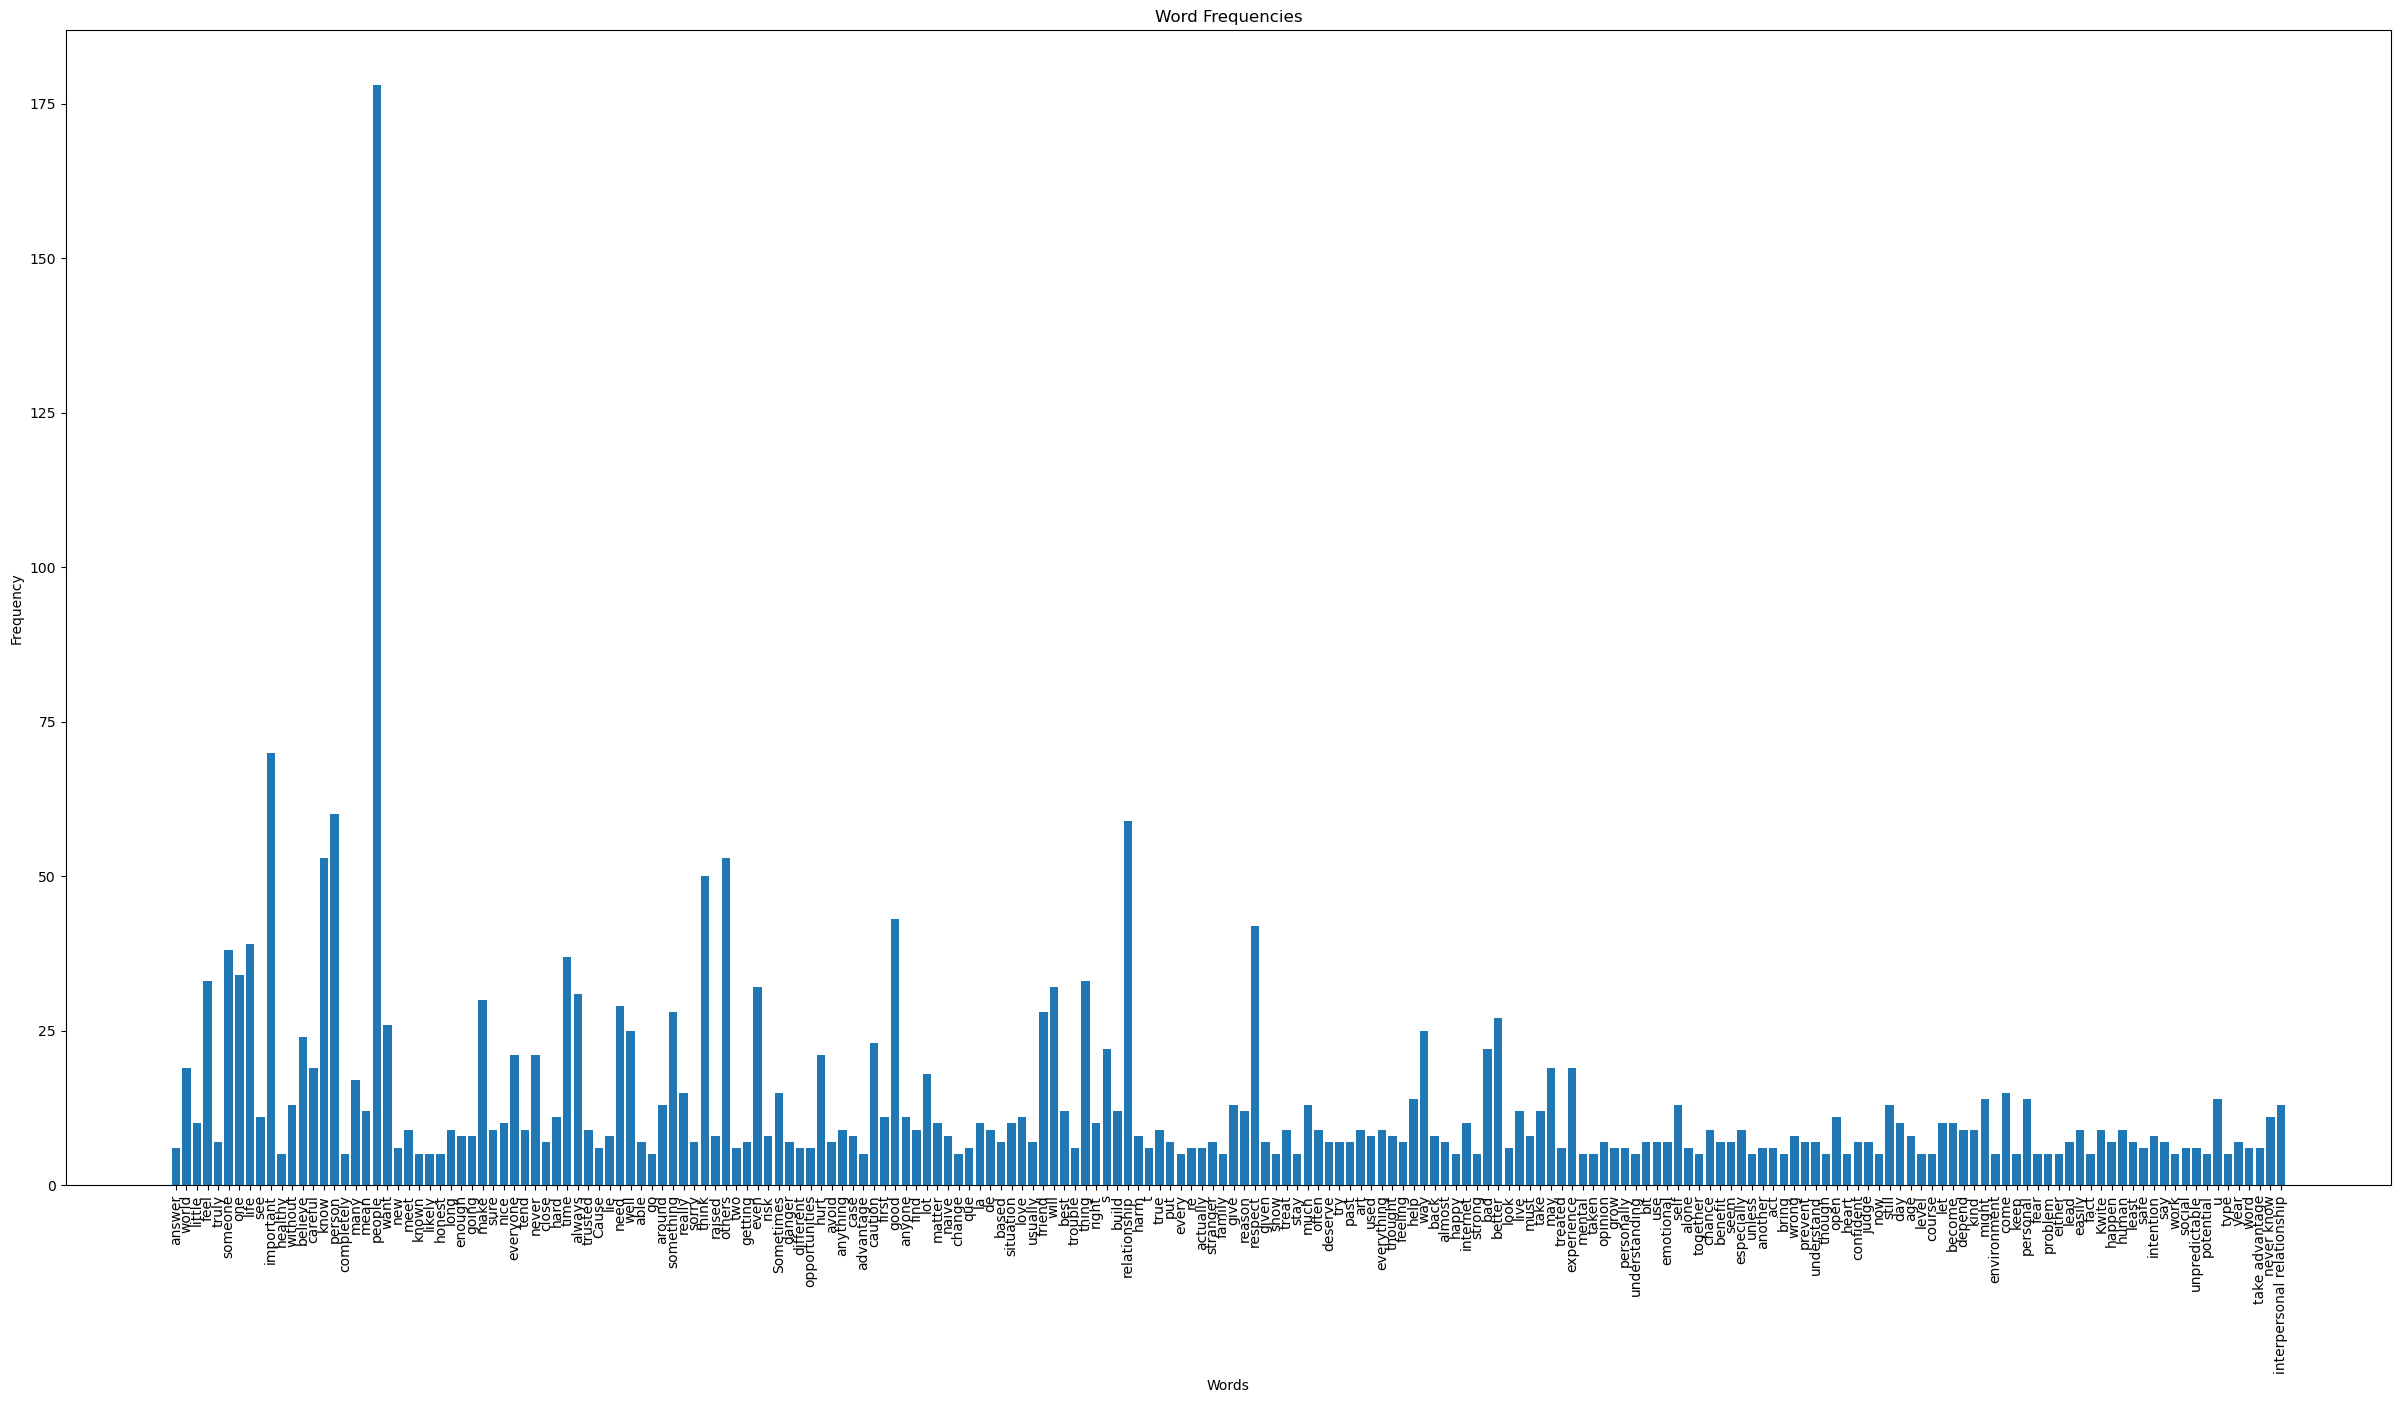

In [12]:
# Generate word frequency dictionary for words displayed in wordcloud
word_freq = {word: freq for word, freq in wordcloud.process_text(reasons).items() if word in wordcloud.words_}

# Plot word frequency bar chart
fig_size = plt.figure()
fig_size.set_figwidth(30)
fig_size.set_figheight(15)
plt.bar(word_freq.keys(), word_freq.values())
plt.title('Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

fig2 = plt.gcf()
fig2.savefig('Trust-Caution_WordFrequencies.png', dpi=300)

plt.show()